In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("../data/Leases.csv")


In [5]:
df_relevant = df[['year','quarter', 'market', 'region', 'city', 'state', 'internal_class', 'leasedSF', 'internal_industry', 'availability_proportion', 'internal_class_rent', 'overall_rent']]
df_relevant = df_relevant.dropna(subset='internal_industry')
df_relevant

,year,quarter,market,region,city,state,internal_class,leasedSF,internal_industry,availability_proportion,internal_class_rent,overall_rent
0,2018,Q1,Atlanta,South,Atlanta,GA,A,24736.0,Financial Services and Insurance,0.200109,27.655891,24.345689
6,2018,Q1,Atlanta,South,Peachtree Corners,GA,A,13207.0,"Construction, Engineering and Architecture",0.200109,27.655891,24.345689
9,2018,Q1,Atlanta,South,Atlanta,GA,A,15795.0,"Technology, Advertising, Media, and Information",0.200109,27.655891,24.345689
14,2018,Q1,Atlanta,South,Atlanta,GA,A,49914.0,"Technology, Advertising, Media, and Information",0.200109,27.655891,24.345689
30,2018,Q1,Atlanta,South,Atlanta,GA,A,14717.0,"Manufacturing (except Pharmaceutical, Retail, ...",0.200109,27.655891,24.345689
...,...,...,...,...,...,...,...,...,...,...,...,...
194679,2024,Q4,Tampa,South,Tampa,FL,A,14883.0,Financial Services and Insurance,0.230000,32.980000,29.460000
194680,2024,Q4,Tampa,South,Tampa,FL,A,19654.0,"Construction, Engineering and Architecture",0.230000,32.980000,29.460000
194682,2024,Q4,Tampa,South,Tampa,FL,O,8475.0,Legal Services,0.168000,25.600000,29.460000
194683,2024,Q4,Tampa,South,Tampa,FL,A,2014.0,Legal Services,0.230000,32.980000,29.460000


In [6]:
df_average = df_relevant.groupby(['year', 'quarter', 'market', 'internal_class', 'internal_industry']).agg({
    'leasedSF': 'mean',
    'availability_proportion' : 'mean',
    'internal_class_rent' : 'mean',
    'overall_rent' : 'mean'
    }).reset_index()
df_average = df_average.dropna(subset= ['availability_proportion', 'internal_class_rent'])
df_average

,year,quarter,market,internal_class,internal_industry,leasedSF,availability_proportion,internal_class_rent,overall_rent
0,2018,Q1,Atlanta,A,"Business, Professional, and Consulting Service...",21917.5,0.200109,27.655891,24.345689
1,2018,Q1,Atlanta,A,"Construction, Engineering and Architecture",18259.5,0.200109,27.655891,24.345689
2,2018,Q1,Atlanta,A,Coworking and Executive Suite Companies,29900.5,0.200109,27.655891,24.345689
3,2018,Q1,Atlanta,A,Financial Services and Insurance,18060.8,0.200109,27.655891,24.345689
4,2018,Q1,Atlanta,A,Healthcare,178001.0,0.200109,27.655891,24.345689
...,...,...,...,...,...,...,...,...,...
10195,2024,Q4,Tampa,O,Government,8353.0,0.168000,25.600000,29.460000
10196,2024,Q4,Tampa,O,Legal Services,4737.5,0.168000,25.600000,29.460000
10197,2024,Q4,Tampa,O,Personal Services and Recreation,40595.0,0.168000,25.600000,29.460000
10198,2024,Q4,Tampa,O,Real Estate (except coworking providers),2798.0,0.168000,25.600000,29.460000


In [7]:
df_tech = df_average[df_average['internal_industry'] == 'Technology, Advertising, Media, and Information']
df_tech

,year,quarter,market,internal_class,internal_industry,leasedSF,availability_proportion,internal_class_rent,overall_rent
9,2018,Q1,Atlanta,A,"Technology, Advertising, Media, and Information",15941.000000,0.200109,27.655891,24.345689
15,2018,Q1,Atlanta,O,"Technology, Advertising, Media, and Information",31230.333333,0.193419,18.560886,24.345689
22,2018,Q1,Austin,A,"Technology, Advertising, Media, and Information",46150.500000,0.116311,40.384706,36.596618
28,2018,Q1,Baltimore,A,"Technology, Advertising, Media, and Information",59161.000000,0.166045,27.104835,22.954034
38,2018,Q1,Boston,A,"Technology, Advertising, Media, and Information",33029.666667,0.128711,42.297880,32.409956
...,...,...,...,...,...,...,...,...,...
10131,2024,Q4,Seattle,A,"Technology, Advertising, Media, and Information",48317.500000,0.320565,50.410000,45.200000
10137,2024,Q4,Seattle,O,"Technology, Advertising, Media, and Information",4553.000000,0.241766,35.780000,45.200000
10162,2024,Q4,South Florida,A,"Technology, Advertising, Media, and Information",8863.000000,0.202000,54.660000,47.700000
10176,2024,Q4,South Florida,O,"Technology, Advertising, Media, and Information",5039.000000,0.150000,37.010000,47.700000


In [8]:
df_fin = df_average[df_average['internal_industry'] == 'Financial Services and Insurance']
df_fin

,year,quarter,market,internal_class,internal_industry,leasedSF,availability_proportion,internal_class_rent,overall_rent
3,2018,Q1,Atlanta,A,Financial Services and Insurance,18060.800000,0.200109,27.655891,24.345689
13,2018,Q1,Atlanta,O,Financial Services and Insurance,50900.000000,0.193419,18.560886,24.345689
20,2018,Q1,Austin,A,Financial Services and Insurance,21733.000000,0.116311,40.384706,36.596618
31,2018,Q1,Baltimore,O,Financial Services and Insurance,1651.000000,0.162200,20.120990,22.954034
44,2018,Q1,Charlotte,A,Financial Services and Insurance,161855.000000,0.158099,28.589370,26.037735
...,...,...,...,...,...,...,...,...,...
10134,2024,Q4,Seattle,O,Financial Services and Insurance,2550.000000,0.241766,35.780000,45.200000
10153,2024,Q4,South Florida,A,Financial Services and Insurance,11387.181818,0.202000,54.660000,47.700000
10168,2024,Q4,South Florida,O,Financial Services and Insurance,5250.375000,0.150000,37.010000,47.700000
10189,2024,Q4,Tampa,A,Financial Services and Insurance,24461.666667,0.230000,32.980000,29.460000


In [9]:
df_legal = df_average[df_average['internal_industry'] == 'Legal Services']
df_legal

,year,quarter,market,internal_class,internal_industry,leasedSF,availability_proportion,internal_class_rent,overall_rent
5,2018,Q1,Atlanta,A,Legal Services,69638.500000,0.200109,27.655891,24.345689
25,2018,Q1,Austin,O,Legal Services,1347.000000,0.121082,30.118658,36.596618
37,2018,Q1,Boston,A,Legal Services,100593.000000,0.128711,42.297880,32.409956
50,2018,Q1,Charlotte,O,Legal Services,939.000000,0.108485,20.755558,26.037735
121,2018,Q1,Houston,A,Legal Services,16274.500000,0.286658,32.105381,27.923124
...,...,...,...,...,...,...,...,...,...
10135,2024,Q4,Seattle,O,Legal Services,2481.000000,0.241766,35.780000,45.200000
10156,2024,Q4,South Florida,A,Legal Services,9631.533333,0.202000,54.660000,47.700000
10171,2024,Q4,South Florida,O,Legal Services,3011.250000,0.150000,37.010000,47.700000
10191,2024,Q4,Tampa,A,Legal Services,43335.750000,0.230000,32.980000,29.460000


In [10]:
df_tech_A = df_tech[df_tech['internal_class'] == 'A']
df_tech_O = df_tech[df_tech['internal_class'] == 'O']
df_fin_A = df_fin[df_fin['internal_class'] == 'A']
df_fin_O = df_fin[df_fin['internal_class'] == 'O']
df_legal_A = df_legal[df_legal['internal_class'] == 'A']
df_legal_O = df_legal[df_legal['internal_class'] == 'O']

/var/folders/4g/nqxcgmps22dbx0qvs4pk9mdh0000gn/T/ipykernel_3917/2398661562.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_sorttech_A, x='year', y='cumulative_growth_factor', hue='market', ci=None)


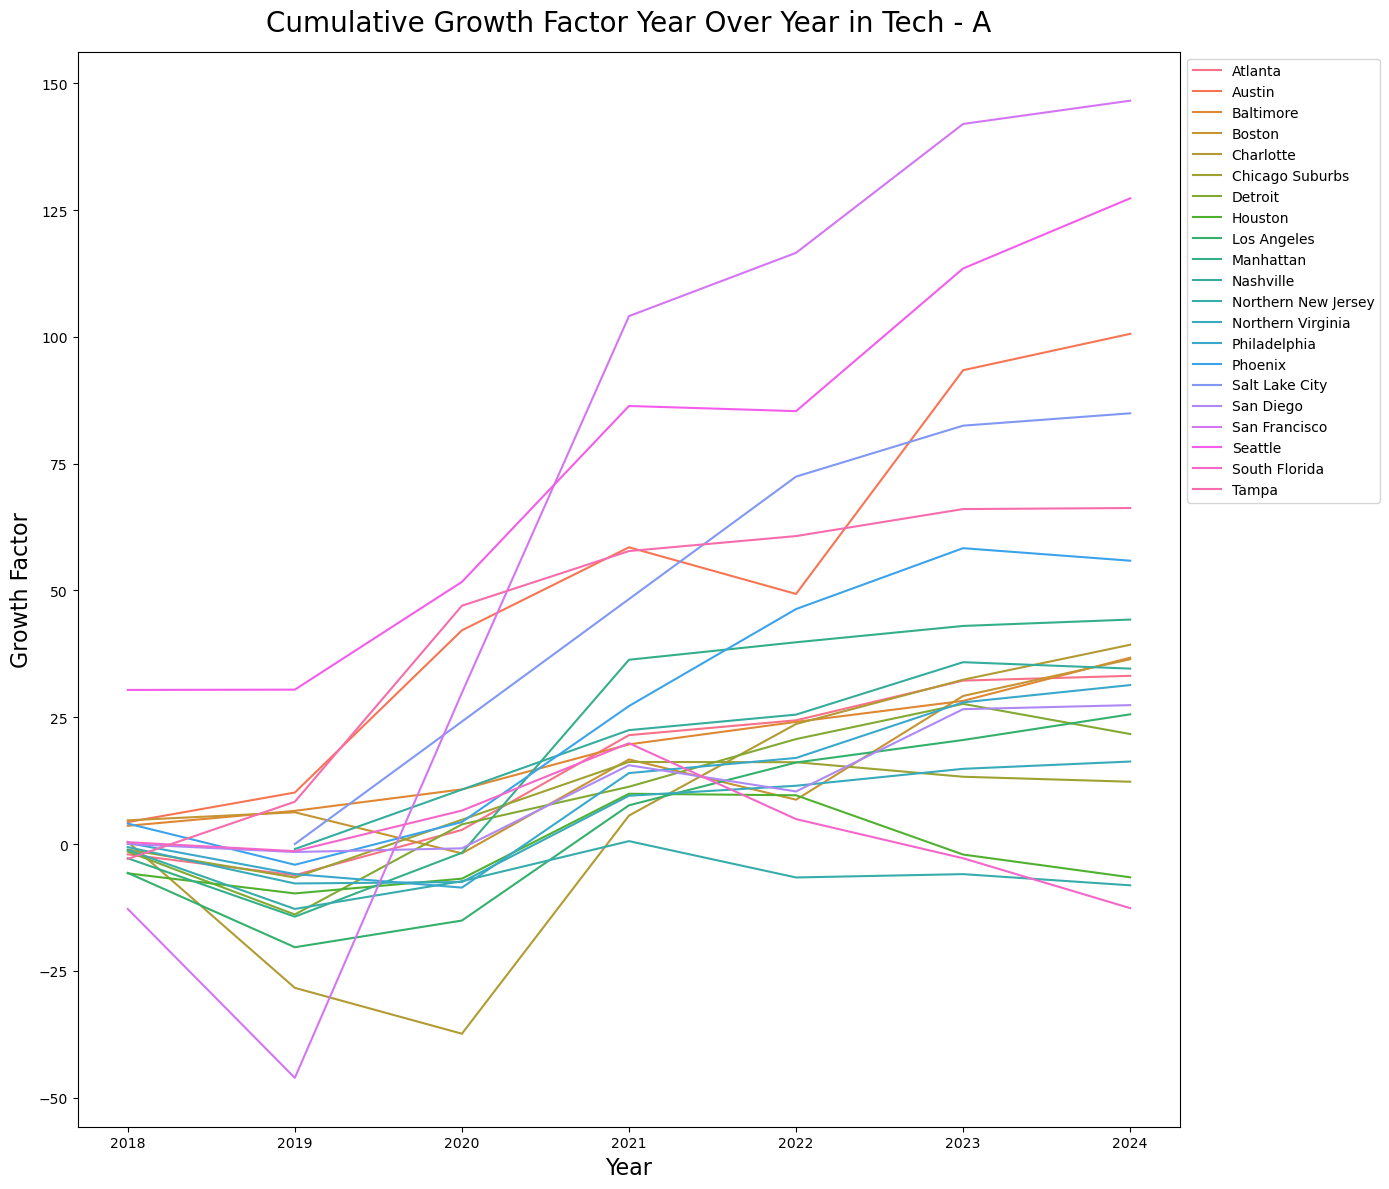

In [11]:
# First ensure data is sorted by market and year
df_tech_A = df_tech_A.sort_values(['market', 'year'])
# Create a new column with percentage increase compared to previous year
df_tech_A['rent_growth'] = df_tech_A.groupby('market')['internal_class_rent'].pct_change() * 100
df_tech_A['rent_growth'] = df_tech_A['rent_growth'].fillna(0)
df_tech_A['availability_growth'] = df_tech_A.groupby('market')['availability_proportion'].pct_change() * 100
df_tech_A['availability_growth'] = df_tech_A['availability_growth'].fillna(0)

df_tech_A['enhanced_growth'] = -1*df_tech_A['rent_growth'] + df_tech_A['availability_growth']
df_tech_A.to_csv('dftechA.csv')

# First ensure data is sorted by market and year
df_sorttech_A = df_tech_A.sort_values(['market', 'year'])
# Calculate cumulative growth factor within each market
df_sorttech_A['cumulative_growth_factor'] = df_sorttech_A.groupby('market')['enhanced_growth'].cumsum()

plt.figure(figsize=(14, 12))
sns.lineplot(data=df_sorttech_A, x='year', y='cumulative_growth_factor', hue='market', ci=None)
plt.title('Cumulative Growth Factor Year Over Year in Tech - A', fontsize = 20, pad=15)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Growth Factor', fontsize = 16)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

/var/folders/4g/nqxcgmps22dbx0qvs4pk9mdh0000gn/T/ipykernel_3917/3210576570.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_sorttech_O, x='year', y='cumulative_growth_factor', hue='market', ci=None)


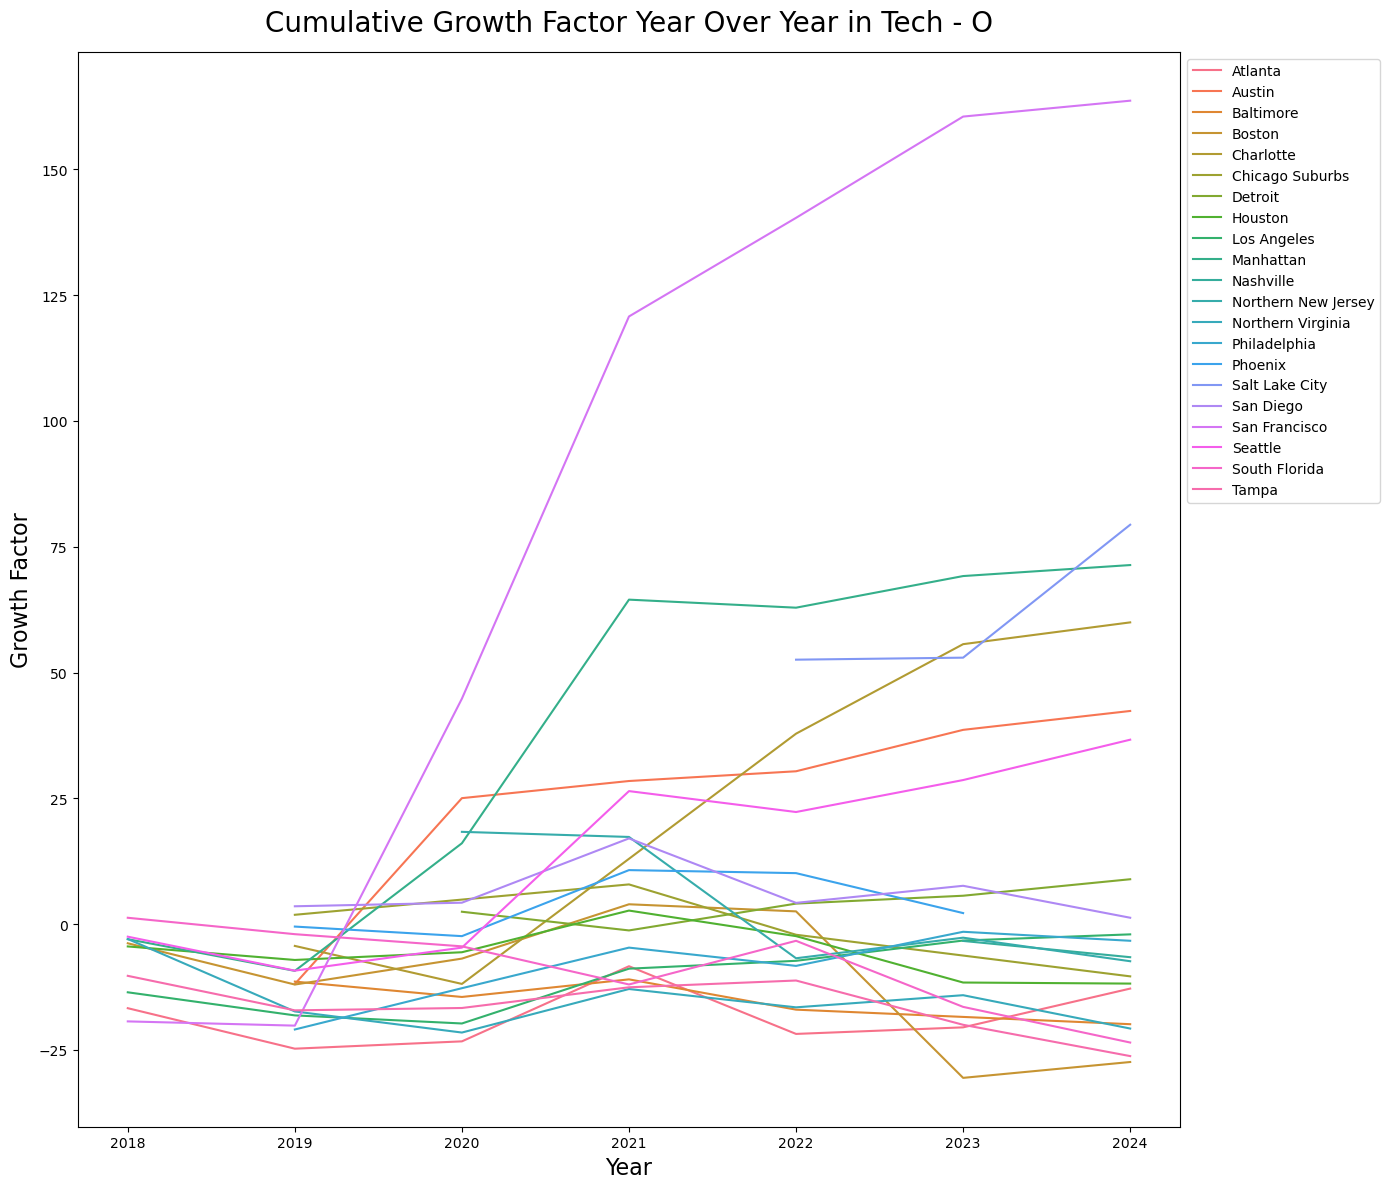

In [12]:
# First ensure data is sorted by market and year
df_tech_O = df_tech_O.sort_values(['market', 'year'])
# Create a new column with percentage increase compared to previous year
df_tech_O['rent_growth'] = df_tech_O.groupby('market')['internal_class_rent'].pct_change() * 100
df_tech_A['rent_growth'] = df_tech_O['rent_growth'].fillna(0)
df_tech_O['availability_growth'] = df_tech_O.groupby('market')['availability_proportion'].pct_change() * 100
df_tech_O['availability_growth'] = df_tech_O['availability_growth'].fillna(0)
df_tech_O.to_csv('dftechO.csv')

df_tech_O['enhanced_growth'] = -1*df_tech_O['rent_growth'] + df_tech_O['availability_growth']

# First ensure data is sorted by market and year
df_sorttech_O = df_tech_O.sort_values(['market', 'year'])
# Calculate cumulative growth factor within each market
df_sorttech_O['cumulative_growth_factor'] = df_sorttech_O.groupby('market')['enhanced_growth'].cumsum()

plt.figure(figsize=(14, 12))
sns.lineplot(data=df_sorttech_O, x='year', y='cumulative_growth_factor', hue='market', ci=None)
plt.title('Cumulative Growth Factor Year Over Year in Tech - O', fontsize = 20, pad=15)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Growth Factor', fontsize = 16)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

/var/folders/4g/nqxcgmps22dbx0qvs4pk9mdh0000gn/T/ipykernel_3917/4065524993.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_sortfin_A, x='year', y='cumulative_growth_factor', hue='market', ci=None)


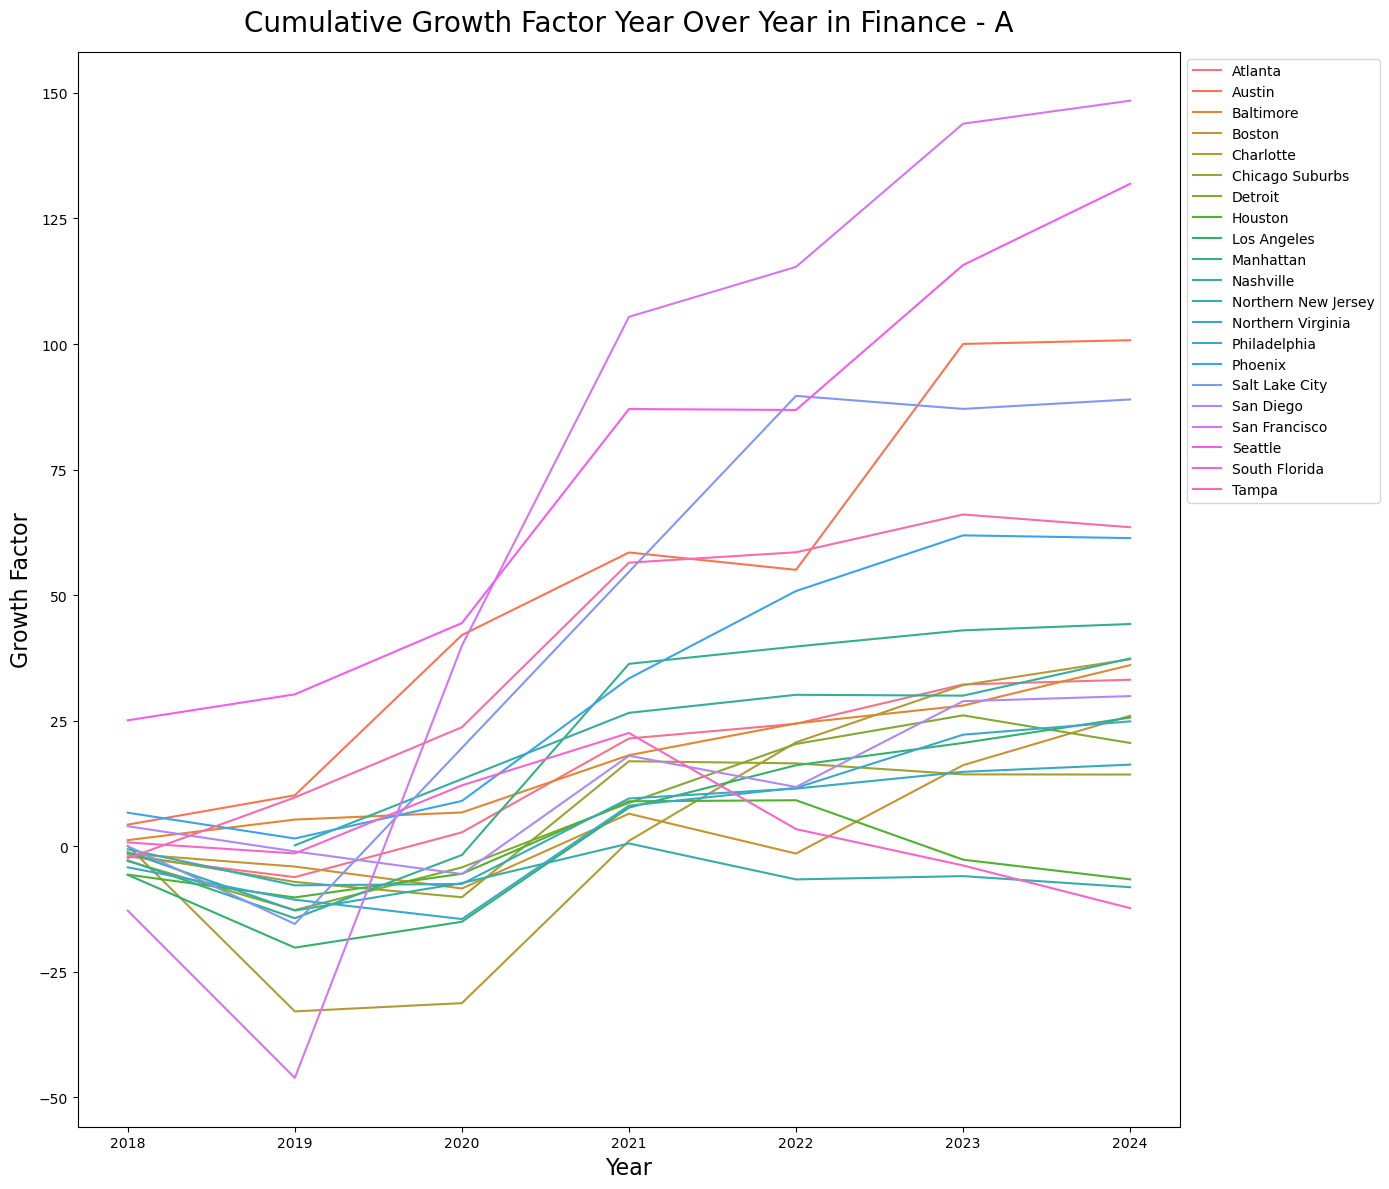

In [13]:
# First ensure data is sorted by market and year
df_fin_A = df_fin_A.sort_values(['market', 'year'])
# Create a new column with percentage increase compared to previous year
df_fin_A['rent_growth'] = df_fin_A.groupby('market')['internal_class_rent'].pct_change() * 100
df_fin_A['rent_growth'] = df_fin_A['rent_growth'].fillna(0)
df_fin_A['availability_growth'] = df_fin_A.groupby('market')['availability_proportion'].pct_change() * 100
df_fin_A['availability_growth'] = df_fin_A['availability_growth'].fillna(0)
df_fin_A

df_fin_A['enhanced_growth'] = -1*df_fin_A['rent_growth'] + df_fin_A['availability_growth']

# First ensure data is sorted by market and year
df_sortfin_A = df_fin_A.sort_values(['market', 'year'])
# Calculate cumulative growth factor within each market
df_sortfin_A['cumulative_growth_factor'] = df_sortfin_A.groupby('market')['enhanced_growth'].cumsum()

plt.figure(figsize=(14, 12))
sns.lineplot(data=df_sortfin_A, x='year', y='cumulative_growth_factor', hue='market', ci=None)
plt.title('Cumulative Growth Factor Year Over Year in Finance - A', fontsize = 20, pad=15)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Growth Factor', fontsize = 16)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

/var/folders/4g/nqxcgmps22dbx0qvs4pk9mdh0000gn/T/ipykernel_3917/2342334561.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_sortfin_O, x='year', y='cumulative_growth_factor', hue='market', ci=None)


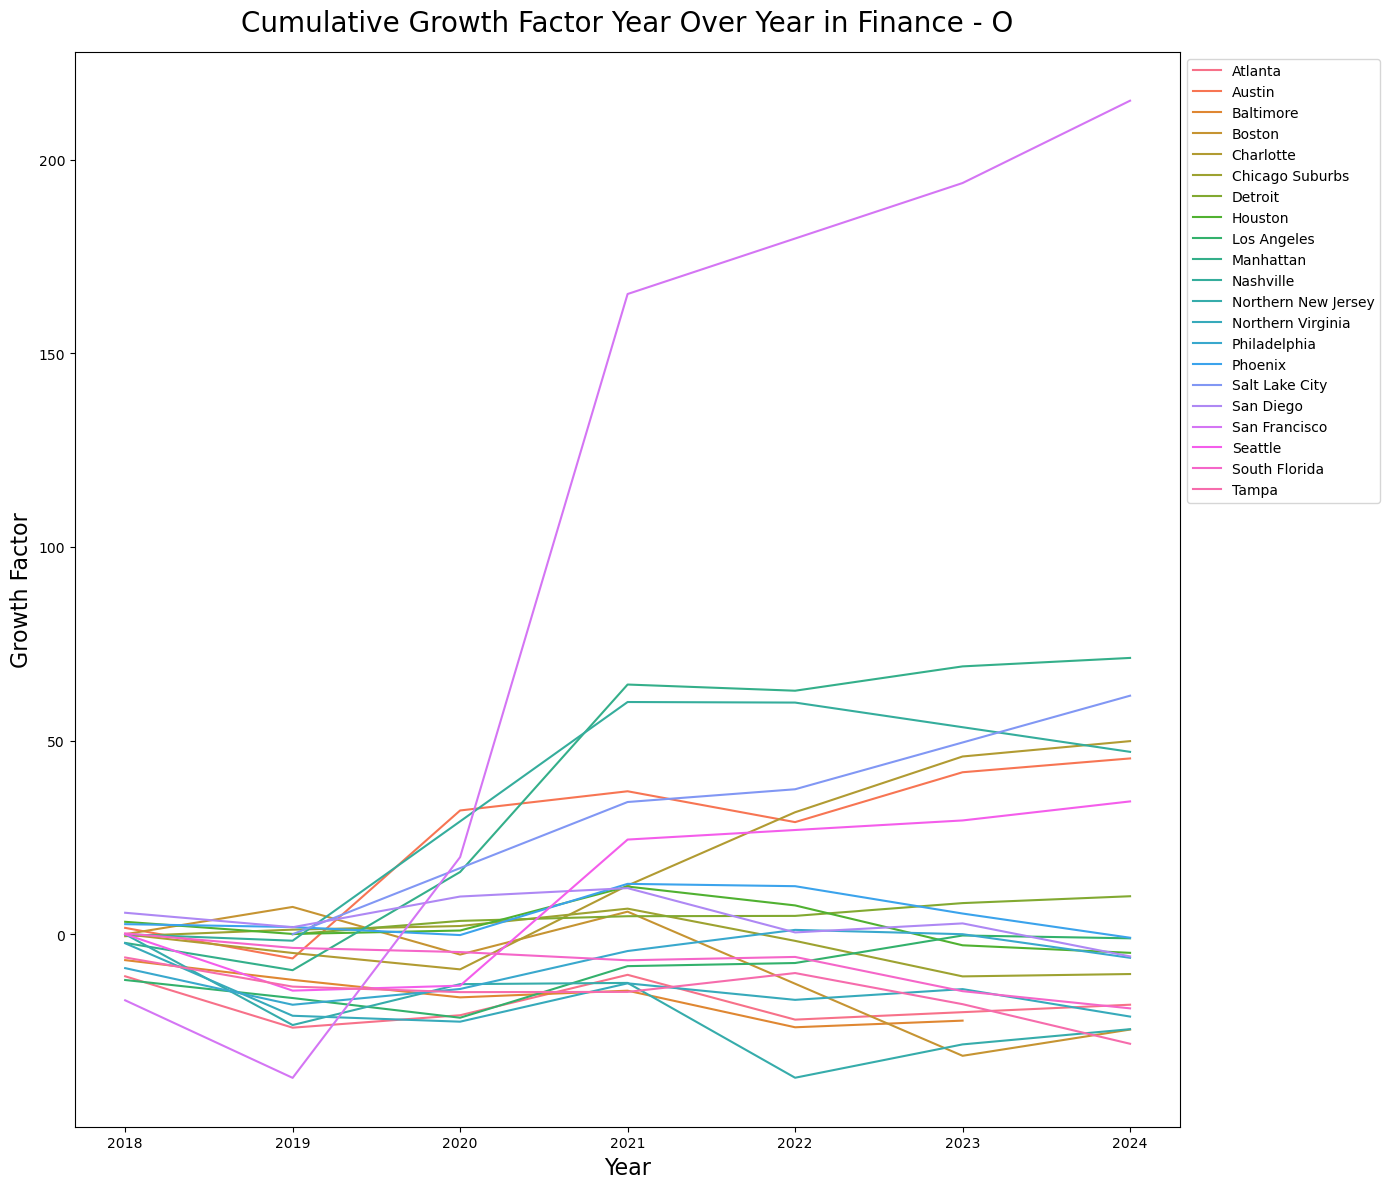

In [14]:
# First ensure data is sorted by market and year
df_fin_O = df_fin_O.sort_values(['market', 'year'])
# Create a new column with percentage increase compared to previous year
df_fin_O['rent_growth'] = df_fin_O.groupby('market')['internal_class_rent'].pct_change() * 100
df_fin_O['rent_growth'] = df_fin_O['rent_growth'].fillna(0)
df_fin_O['availability_growth'] = df_fin_O.groupby('market')['availability_proportion'].pct_change() * 100
df_fin_O['availability_growth'] = df_fin_O['availability_growth'].fillna(0)
df_fin_O

df_fin_O['enhanced_growth'] = -1*df_fin_O['rent_growth'] + df_fin_O['availability_growth']

# First ensure data is sorted by market and year
df_sortfin_O = df_fin_O.sort_values(['market', 'year'])
# Calculate cumulative growth factor within each market
df_sortfin_O['cumulative_growth_factor'] = df_sortfin_O.groupby('market')['enhanced_growth'].cumsum()

plt.figure(figsize=(14, 12))
sns.lineplot(data=df_sortfin_O, x='year', y='cumulative_growth_factor', hue='market', ci=None)
plt.title('Cumulative Growth Factor Year Over Year in Finance - O', fontsize = 20, pad=15)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Growth Factor', fontsize = 16)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

/var/folders/4g/nqxcgmps22dbx0qvs4pk9mdh0000gn/T/ipykernel_3917/1823659818.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_sortlegal_O, x='year', y='cumulative_growth_factor', hue='market', ci=None)


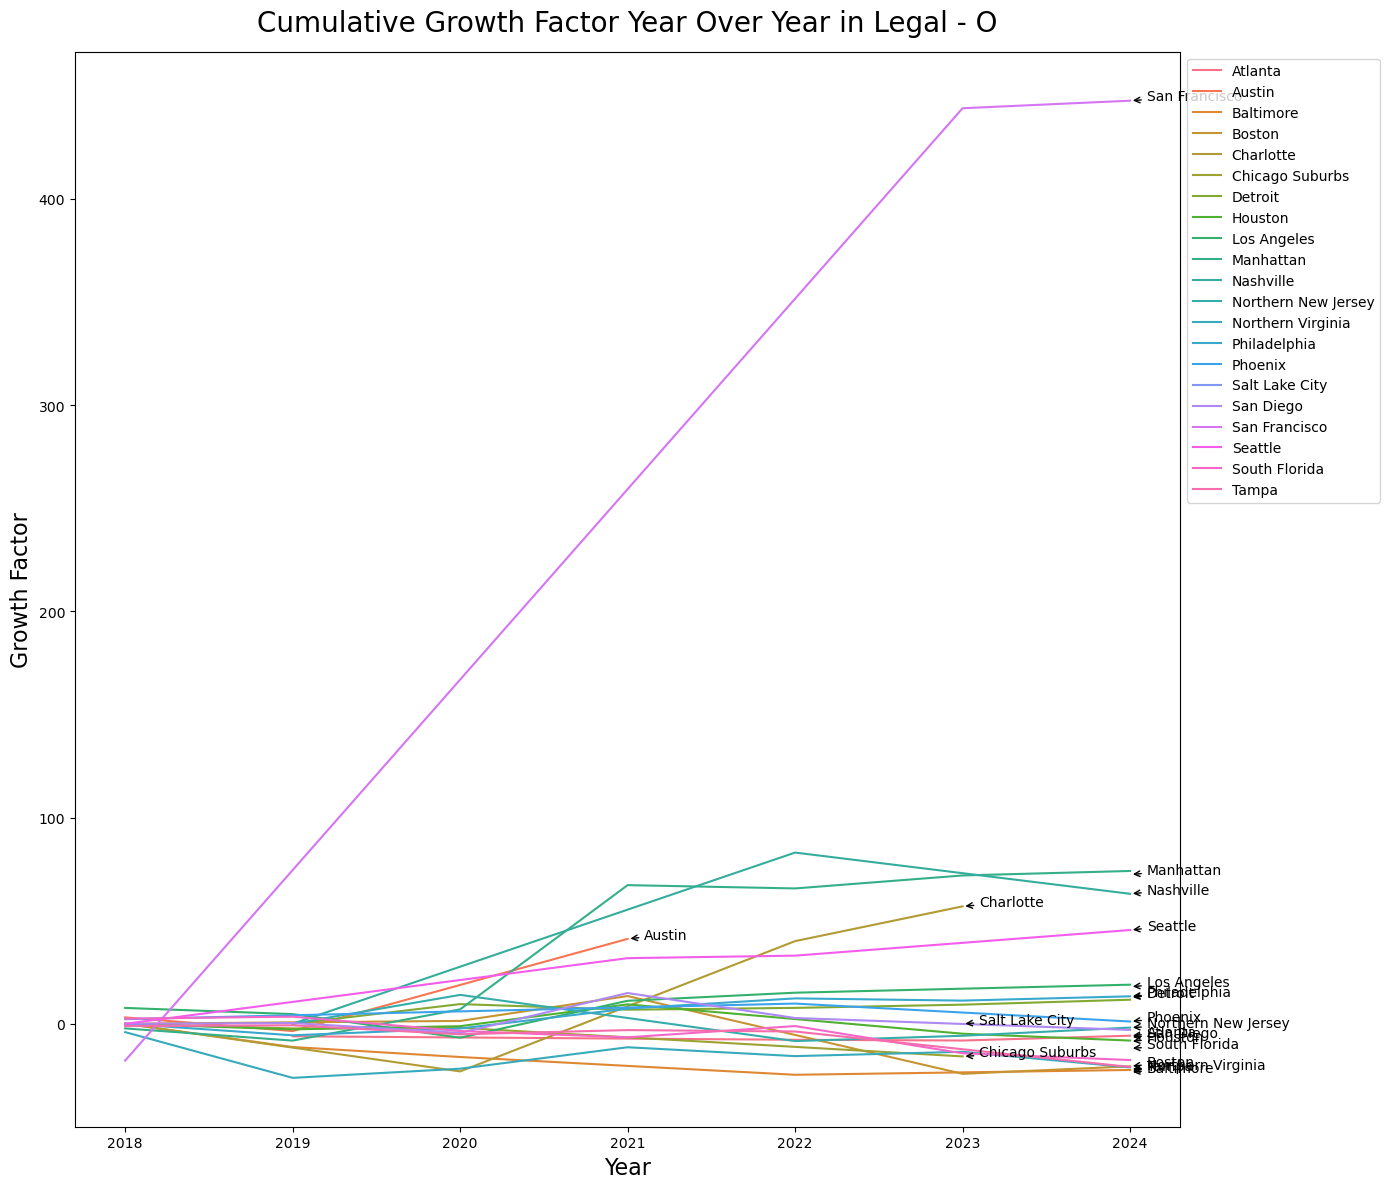

In [15]:
# First ensure data is sorted by market and year
df_legal_O = df_legal_O.sort_values(['market', 'year'])
# Create a new column with percentage increase compared to previous year
df_legal_O['rent_growth'] = df_legal_O.groupby('market')['internal_class_rent'].pct_change() * 100
df_legal_O['rent_growth'] = df_legal_O['rent_growth'].fillna(0)
df_legal_O['availability_growth'] = df_legal_O.groupby('market')['availability_proportion'].pct_change() * 100
df_legal_O['availability_growth'] = df_legal_O['availability_growth'].fillna(0)

df_legal_O['enhanced_growth'] = -1*df_legal_O['rent_growth'] + df_legal_O['availability_growth']

# First ensure data is sorted by market and year
df_sortlegal_O = df_legal_O.sort_values(['market', 'year'])
# Calculate cumulative growth factor within each market
df_sortlegal_O['cumulative_growth_factor'] = df_sortlegal_O.groupby('market')['enhanced_growth'].cumsum()

plt.figure(figsize=(14, 12))
sns.lineplot(data=df_sortlegal_O, x='year', y='cumulative_growth_factor', hue='market', ci=None)
plt.title('Cumulative Growth Factor Year Over Year in Legal - O', fontsize = 20, pad=15)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Growth Factor', fontsize = 16)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

for market in df_sortlegal_O['market'].unique():
    # Get the last data point for each market (or you can use other points if preferred)
    last_year = df_sortlegal_O[df_sortlegal_O['market'] == market]['year'].max()
    last_value = df_sortlegal_O[df_sortlegal_O['market'] == market].loc[df_sortlegal_O['year'] == last_year, 'cumulative_growth_factor'].values[0]
    
    # Annotate the plot with the market name
    plt.annotate(market, 
                 xy=(last_year, last_value), 
                 xytext=(last_year + 0.1, last_value + 0.1),  # Adjust the text position
                 arrowprops=dict(arrowstyle="->", color='black'),
                 fontsize=10)

plt.tight_layout()
plt.show()

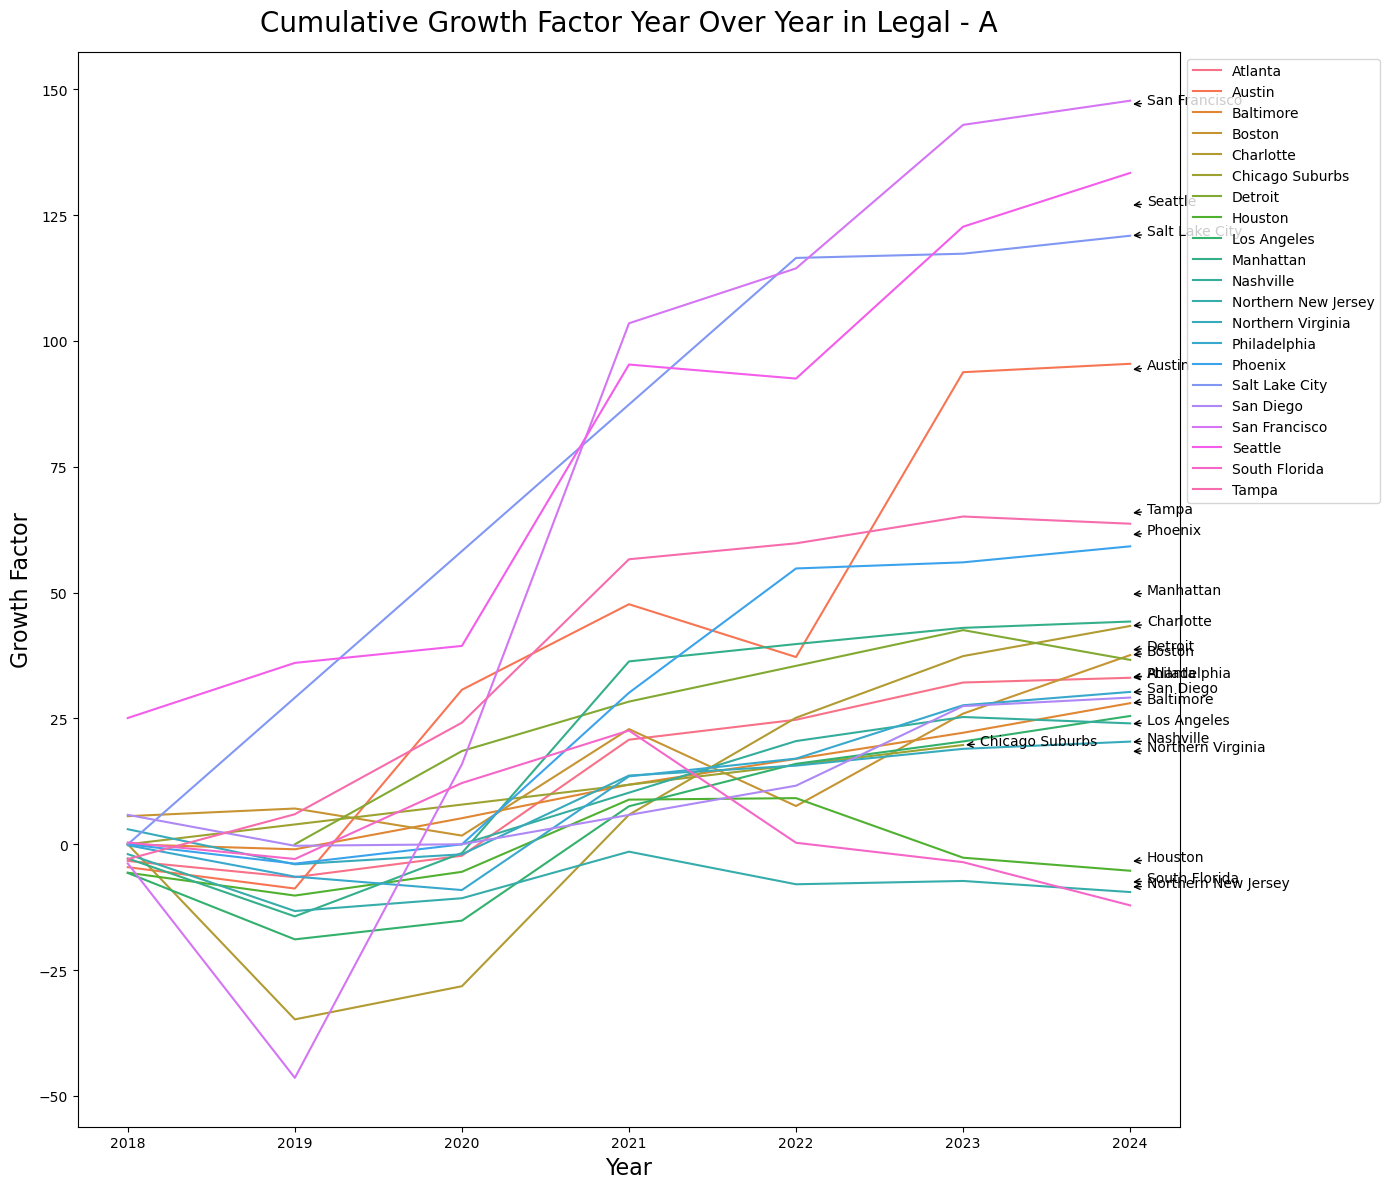

In [16]:
# First ensure data is sorted by market and year
df_legal_A = df_legal_A.sort_values(['market', 'year'])
# Create a new column with percentage increase compared to previous year
df_legal_A['rent_growth'] = df_legal_A.groupby('market')['internal_class_rent'].pct_change() * 100
df_legal_A['rent_growth'] = df_legal_A['rent_growth'].fillna(0)
df_legal_A['availability_growth'] = df_legal_A.groupby('market')['availability_proportion'].pct_change() * 100
df_legal_A['availability_growth'] = df_legal_A['availability_growth'].fillna(0)

df_legal_A['enhanced_growth'] = -1*df_legal_A['rent_growth'] + df_legal_A['availability_growth']

# First ensure data is sorted by market and year
df_sortlegal_A = df_legal_A.sort_values(['market', 'year'])
# Calculate cumulative growth factor within each market
df_sortlegal_A['cumulative_growth_factor'] = df_sortlegal_A.groupby('market')['enhanced_growth'].cumsum()

plt.figure(figsize=(14, 12))
sns.lineplot(data=df_sortlegal_A, x='year', y='cumulative_growth_factor', hue='market', errorbar=None)

plt.title('Cumulative Growth Factor Year Over Year in Legal - A', fontsize = 20, pad=15)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Growth Factor', fontsize = 16)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

for market in df_sortlegal_A['market'].unique():
    # Get the last data point for each market (or you can use other points if preferred)
    last_year = df_sortlegal_A[df_sortlegal_A['market'] == market]['year'].max()
    last_value = df_sortlegal_A[df_sortlegal_A['market'] == market].loc[df_sortlegal_A['year'] == last_year, 'cumulative_growth_factor'].values[0]
    
    # Annotate the plot with the market name
    plt.annotate(market, 
                 xy=(last_year, last_value), 
                 xytext=(last_year + 0.1, last_value + 0.1),  # Adjust the text position
                 arrowprops=dict(arrowstyle="->", color='black'),
                 fontsize=10)
    
    
plt.tight_layout()
plt.show()

In [17]:
df_legal_O[df_legal_O['market'] == 'San Francisco']

,year,quarter,market,internal_class,internal_industry,leasedSF,availability_proportion,internal_class_rent,overall_rent,rent_growth,availability_growth,enhanced_growth
254,2018,Q1,San Francisco,O,Legal Services,2828.000000,0.108499,64.578920,67.099766,0.000000,0.000000,0.000000
1236,2018,Q4,San Francisco,O,Legal Services,2126.666667,0.072758,66.344303,72.751660,2.733683,-32.941706,-35.675389
8454,2023,Q4,San Francisco,O,Legal Services,22413.000000,0.414977,60.225688,68.816585,-9.222517,470.354754,479.577270
10123,2024,Q4,San Francisco,O,Legal Services,23044.000000,0.406000,56.720000,67.840000,-5.820919,-2.163223,3.657696
